<a href="https://colab.research.google.com/github/s29897/PTO2-Python/blob/main/Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2

In this tutorial, you will explore and learn how to use key Python libraries such as **NumPy**, **Pandas**, and **Matplotlib**. Additionally, you will learn how to import datasets from files as well as from the web.

## Introduction

### Importing external library
You only need to import library **once** at the beginning of the execution chain.

In [ ]:
import numpy as np

### NumPy

NumPy is used for working with arrays and performing numerical operations.

#### Basic operations

In [ ]:
import numpy as np

# python array
pyarr = [1, 2, 3, 4, 5]
print(pyarr)

# numpy array
arr = np.array([1, 2, 3, 4, 5])
print(arr)

# Basic operations
print("Mean:", np.mean(arr))
print("Standard Deviation:", np.std(arr))
print("Sum:", np.sum(arr))

[1, 2, 3, 4, 5]
[1 2 3 4 5]
Mean: 3.0
Standard Deviation: 1.4142135623730951
Sum: 15


#### Vectors and matrices

In [ ]:
# Creating NumPy arrays (1D and 2D)
a = np.array([1, 2, 3])            # vector
b = np.array([[1, 2], [3, 4]])     # 2x2 matrix

# Mathematical operations
c = a + 10             # add 10 to each element
d = b * 2              # scalar multiplication
e = a * a              # element-wise multiplication
f = np.dot(a, a)       # dot product (scalar)

# Matrix operations
dot = np.dot(b, b)       # matrix multiplication
transpose = np.transpose(b)    # matrix transpose
inverse = np.linalg.inv([[1, 2], [3, 4]])  # matrix inverse (if invertible)

print("Matrix b * b:\n", dot, "\n")
print("Transpose of b:\n", transpose, "\n")
print("Matrix inverse of matrix [[1, 2], [3, 4]]:\n", inverse, "\n")

Matrix b * b:
 [[ 7 10]
 [15 22]] 

Transpose of b:
 [[1 3]
 [2 4]] 

Matrix inverse of matrix [[1, 2], [3, 4]]:
 [[-2.   1. ]
 [ 1.5 -0.5]] 



#### Slicing

In [ ]:
# 1d
arr = np.arange(1, 10)
a = arr[2:4]     # Elements from index 2 to 4
b = arr[::2]     # Every second element
c = arr[-2:]     # Last 2 elements
d = arr[::-2]    # Every second element in reverse order

print("a) ", a)  # [3 4]
print("b) ", b)  # [1 3 5 7 9]
print("c) ", c)  # [8 9]
print("d) ", d)  # [9 7 5 3 1]

print()

# 2d
arr2d = np.arange(20).reshape(4, 5) # reshape(rows, columns)
print("Original array:\n", arr2d)

a2d = arr2d[:3, -3:] # top right corner 3x3
b2d = arr2d[2]       # 3rd row

print()
print(a2d)
print(b2d)



a)  [3 4]
b)  [1 3 5 7 9]
c)  [8 9]
d)  [9 7 5 3 1]

Original array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

[[ 2  3  4]
 [ 7  8  9]
 [12 13 14]]
[10 11 12 13 14]


#### Performance Comparison – For Loop vs Vectorized Operations

In [ ]:
import numpy as np
import time

n = 1_000_000
a = np.arange(n)
b = np.arange(n)

# Using a for loop
start_loop = time.time()
c_loop = []
for i in range(n):
    c_loop.append(a[i] + b[i])
end_loop = time.time()

# Using vectorized NumPy operation
start_vector = time.time()
c_vector = a + b
end_vector = time.time()

print(f"For loop time: {end_loop - start_loop:.5f} seconds")
print(f"Vectorized time: {end_vector - start_vector:.5f} seconds")

For loop time: 0.36233 seconds
Vectorized time: 0.00372 seconds


### Pandas
Pandas is ideal for handling and analyzing data using dataframes (tables).

In [ ]:
import pandas as pd

# Creating a simple dataframe
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'London']
}
df = pd.DataFrame(data)

print(df)

# Exploring the DataFrame
print("\n Head:\n", df.head())
print("\n Describe:\n", df.describe(include='all'))

      Name  Age      City
0    Alice   25  New York
1      Bob   30     Paris
2  Charlie   35    London

 Head:
       Name  Age      City
0    Alice   25  New York
1      Bob   30     Paris
2  Charlie   35    London

 Describe:
          Name   Age      City
count       3   3.0         3
unique      3   NaN         3
top     Alice   NaN  New York
freq        1   NaN         1
mean      NaN  30.0       NaN
std       NaN   5.0       NaN
min       NaN  25.0       NaN
25%       NaN  27.5       NaN
50%       NaN  30.0       NaN
75%       NaN  32.5       NaN
max       NaN  35.0       NaN


#### Reading from file

The most commonly used function for reading data is `pd.read_csv()` for CSV files.

There are also other formats like `read_excel()`, `read_json()`.

In [ ]:
import pandas as pd

# Reading a CSV file into a pandas DataFrame
df = pd.read_csv('name.csv')

# Display the first 5 rows
print(df.head())

Useful parameters

`skiprows=1`:
- This tells pandas to **skip the first row** when reading the CSV file.
- Typically, `skiprows` is used when the first row contains metadata, extra information, or non-tabular data (like headers in a non-standard position or comments).
- In this case, the first row will not be included in the DataFrame. For example, if the file contains an introductory row or some description at the top, this parameter ensures that it’s ignored when reading the actual data.

`header=None`:
- By default, `read_csv()` assumes that the first row contains **column headers** (the names of the columns).
- By setting `header=None`, you're telling pandas **not to treat any row as column headers**. Instead, pandas will automatically assign numeric column labels (0, 1, 2, etc.).
- This is useful when the CSV file does not have headers or when the header row is not the first row.

In [ ]:
df = pd.read_csv("height_weight_data.csv", skiprows = 1, header=None)

#### Reading files from the web

In [ ]:
import pandas as pd

# URL of the CSV file
url = "https://example.com/path/to/your/file.csv"

# Reading the CSV from the web
df = pd.read_csv(url)

### Matplotlib

#### Basic graph

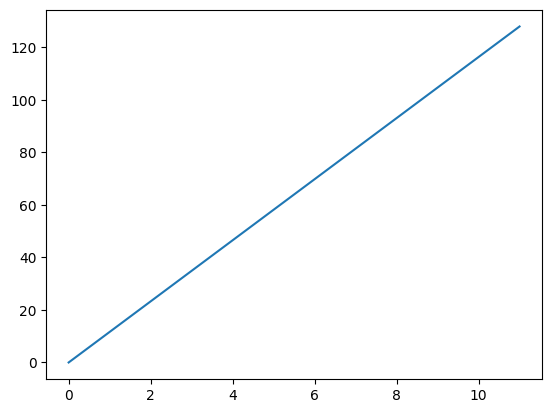

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 11])
ypoints = np.array([0, 128])

plt.plot(xpoints, ypoints)
plt.show()

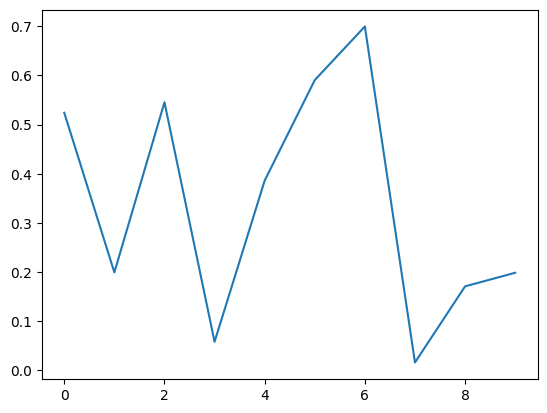

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.random(10)
plt.plot(data)
plt.show()

#### Scatter plot
https://en.wikipedia.org/wiki/Scatter_plot

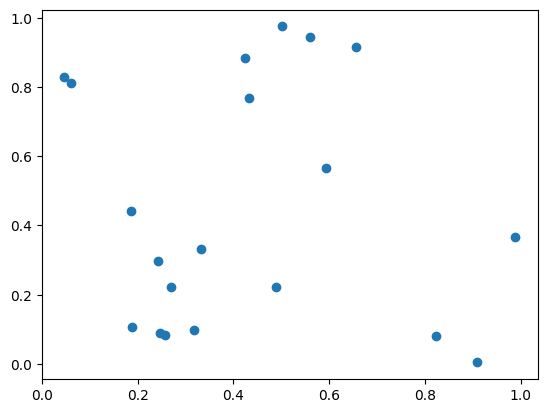

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [np.random.random(20), np.random.random(20)]
plt.scatter(data[0], data[1])
plt.show()

#### Pie chart
https://en.wikipedia.org/wiki/Pie_chart

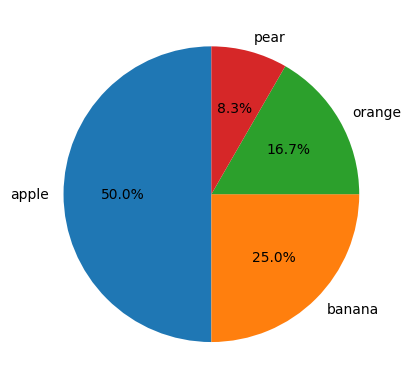

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array(["apple", "banana", "apple", "pear", "banana", "orange", "banana", "apple", "orange", "apple", "apple", "apple"])

unique, counts = np.unique(data, return_counts=True)

plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)
plt.show()

#### Box plot
https://en.wikipedia.org/wiki/Box_plot

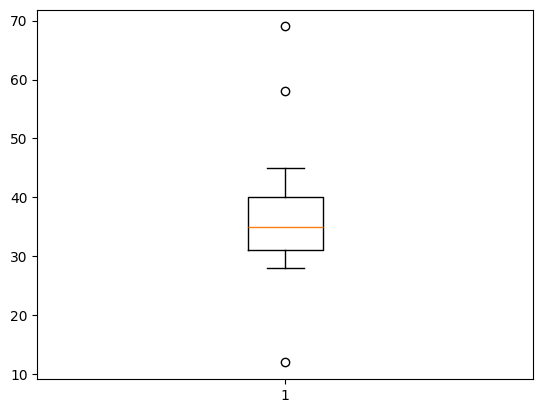

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [12, 30, 31, 35, 37, 40, 32, 33, 34, 41, 38, 28, 45, 31, 36, 58, 69]

plt.boxplot(data)
plt.show()

#### Histogram
https://en.wikipedia.org/wiki/Histogram

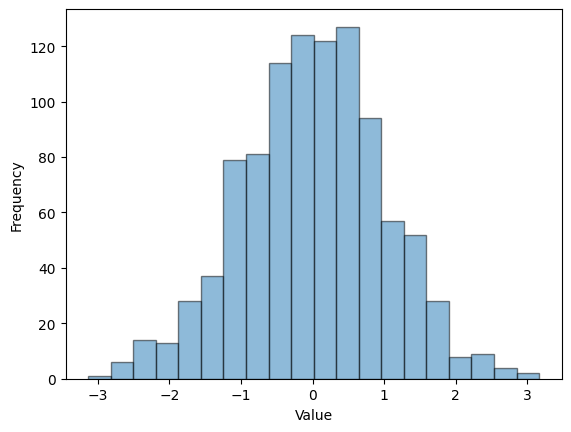

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = np.random.randn(1000)

# Plot histogram
plt.hist(data, bins=20, edgecolor='black', alpha=0.5)

# Add labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

## Exercises

#### Exercise 1
In this exercise, you will explain the following statistical terms. For each term:

1. **Define it** in your own words.
2. **Explain how it's calculated** or how it's used.
3. **Provide an example** to illustrate the concept.

---

##### Terms to Explain:

1. **Median**
   - What is the median? How is it found in a data set?
   - Provide an example.
   
2. **Mean (Average)**
   - Define the mean and explain how to calculate it.
   - Provide an example.

3. **Standard Deviation**
   - What does standard deviation measure?
   - Briefly explain how to calculate it and provide an example.

4. **Quartiles (Q1 and Q3)**
   - Define Q1 and Q3. How are they calculated?
   - Give an example using a small data set.

5. **IQR (Interquartile Range)**
   - Define IQR and explain how it’s calculated.
   - Provide an example.

6. **Variance**
   - What is variance, and how is it calculated?
   - Explain the relationship between variance and standard deviation.
   - Provide an example.

**Median** - the middle value of a data set once the numbers are put in order. It splits the data so that half the values are at or below it and half are at or above it.

To find the median, put the data in ascending order; if the number of values n is odd - the median is the value at position (n+1)/2; if n is even - the median is the average of the values at positions n/2 and n/2 + 1; positions are counted from 1 after sorting.

Example: 2 8 5 6 4 7 9

Order: 2 4 5 6 7 8 9

Median is 6, because it is on the 4th position from the 7 numbers

**Mean** is the sum of all values divided by how many values there are.

Formula: mean = (x1 + x2 + ... + xn) / n.

Example: 2 5 6 4 7
Mean= (2 + 5 + 6 + 4 + 7)/5= 4.8

**Standard deviation** measures how spread out the data are around the mean, in the same units as the data.

find the mean, subtract it from each value, square those differences, average them (divide by n for a population or by n-1 for a sample), then take the square root.

Example with data 2, 4, 6, 8: mean = 5, deviations = -3, -1, 1, 3, squares = 9, 1, 1, 9, sum = 20. Population variance = 20/4 = 5, population SD = sqrt(5) ≈ 2.236. Sample variance = 20/3 ≈ 6.667, sample SD ≈ 2.582.

**Quartiles (Q1 and Q3)**

Q1 is the median of the lower half of the sorted data, Q3 is the median of the upper half.

To calculate sort the data, find the overall median, then take the median of the lower half for Q1 and of the upper half for Q3. For odd n, exclude the overall median when forming the halves. Note: different methods can give slightly different values on small samples.

Example with data 2, 4, 6, 8: sorted is 2, 4, 6, 8. Lower half 2, 4 → Q1 = (2+4)/2 = 3. Upper half 6, 8 → Q3 = (6+8)/2 = 7.

**IQR (interquartile range)** is the middle 50 percent spread of the data.

IQR = Q3 - Q1.

Example using the quartiles above - IQR = 7 - 3 = 4.

**Variance** is the average squared distance of values from the mean.

Variance = sum of squared deviations divided by n for a population or by n-1 for a sample.

standard deviation is the square root of variance.

Example with data 2, 4, 6, 8: sum of squared deviations = 20. Population variance = 20/4 = 5. Sample variance = 20/3 ≈ 6.667. Corresponding SDs are sqrt(5) ≈ 2.236 and sqrt(6.667) ≈ 2.582.






#### Exercise 2
Generate an array of random 100 numbers.

Calculate the following statistics for the array:
- Median
- Mean
- Standard deviation
- First quartile (Q1)
- Third quartile (Q3)
- Interquartile range (IQR)
- Variance

Print the array and the calculated statistics.

Example result:
```console
[0.17165121 0.61747645 0.39826582 0.4707236  0.61388013 0.2276911
 0.31298085 0.20115937 0.10795451 0.22006963 0.40703735 0.02983642
 0.308904   0.82789731 0.67563344 0.67735212 0.58701252 0.10168223
 0.1964611  0.77288573 0.41698776 0.7372897  0.10721326 0.92445719
 0.00173499 0.53950225 0.27424815 0.04274267 0.31071638 0.06689424
 0.0166482  0.34950876 0.97116423 0.13551993 0.03801114 0.96580299
 0.45665163 0.26293525 0.67950108 0.27331487 0.87291717 0.24241789
 0.65478673 0.77976392 0.30852723 0.49931606 0.74704851 0.63121191
 0.43296676 0.26194879 0.83004086 0.05800895 0.09099496 0.50455262
 0.34092432 0.51825112 0.9072013  0.48224947 0.43095947 0.88140047
 0.97092664 0.62284024 0.32432019 0.69784626 0.68389065 0.83843349
 0.65483523 0.1089709  0.22401504 0.42183869 0.73129921 0.28488844
 0.64106247 0.7949042  0.01754107 0.92714389 0.4125867  0.68234723
 0.24529873 0.04389241 0.93576212 0.59933419 0.59723641 0.48393346
 0.30273359 0.27042282 0.74436857 0.22199391 0.71667345 0.22140033
 0.34149772 0.92076753 0.9442233  0.89750259 0.42759872 0.82726639
 0.8555351  0.01961142 0.03418    0.20652359]
Median: 0.43196311650405067
Mean: 0.46870335005716784
Std: 0.2898530747727577
Q1: 0.2267720839331883
Q3: 0.7025530558853881
IQR: 0.4757809719521998
Variance: 0.08401480495522184
```

In [ ]:
import numpy as np
arr = np.random.randint(0, 100, size=100)
mean = np.mean(arr)
median = np.median(arr)
std = np.std(arr, ddof=0)
var = np.var(arr, ddof=0)
q1 = np.percentile(arr, 25)
q3 = np.percentile(arr, 75)
iqr = q3 - q1

print(arr)
print("mean:", mean)
print("median:", median)
print("std:", std)
print("var:", var)
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)


[98 82 55 10 92 93 46 60 59 23 63 92 32 24 32 87 83 80 59  7 15 76 52 63
 85 78 38  5  8 44  9 80 51 84 17 23 61 42 17 42 86  6 68 91 59 22 86 44
 82 36 79 24 24 44 40 48 87 47 19 26 74 42  3 99 99 29 42 33 32 66 35 51
  7 47 72 26 82  1 61 93 37 87 86 56  0 85 32 22 65 77 45  0 62 43 67 77
 66 97 84 56]
mean: 52.23
median: 51.5
std: 28.284573533995523
var: 800.0170999999999
Q1: 31.25
Q3: 79.25
IQR: 48.0


#### Exercise 3
Using **NumPy** library.

Create an array with values from 1 to 100.
Then, use this array to create two smaller arrays:
one containing the odd values and the other containing the even values.
Finally, print both arrays to the console.

Expected result:

```python
Odd:
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]
Even:
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96
 98]
 ```

In [ ]:
import numpy as np

array = np.arange(1, 101)
odd = array[array % 2 == 1]
even = array[array % 2 == 0]
print("Odd:")
print(odd)
print("\nEven:")
print(even)


Odd:
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]

Even:
[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100]


#### Exercise 4

Create a 1D **NumPy** array of numbers from 10 to 19.

Slice the array to get:
 - Elements from index 3 to 7
 - Every second element
 - Last 3 elements
 - All elements in reverse order

In [ ]:
import numpy as np

arr = np.arange(10, 20)
a = arr[3:7]
b = arr[::2]
c = arr[-3:]
d = arr[::-1]
print(a)
print(b)
print(c)
print(d)

[13 14 15 16]
[10 12 14 16 18]
[17 18 19]
[19 18 17 16 15 14 13 12 11 10]


#### Exercise 5

Create a 4x5 array with values from 0 to 19.

Extract using slicing:
 - The second row
 - The third column
 - A subarray of the top-left 2x2 corner
 - A subarray from rows 1 to 3 and columns 2 to 4 (inclusive)

In [ ]:
arr2d = np.arange(0,20).reshape(4, 5) # reshape(rows, columns)
print("Original array:\n", arr2d)

b2d = arr2d[1]
c2d = arr2d[:,2]
top_left_2x2 = arr2d[:2, :2]
sub_1to3_2to4 = arr2d[1:4, 2:5]

print("Second row:\n", b2d)
print("Third column:\n", c2d)
print("Top-left 2x2:\n", top_left_2x2)
print("Rows 1-3, Cols 2-4:\n", sub_1to3_2to4)




Original array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
Second row:
 [5 6 7 8 9]
Third column:
 [ 2  7 12 17]
Top-left 2x2:
 [[0 1]
 [5 6]]
Rows 1-3, Cols 2-4:
 [[ 7  8  9]
 [12 13 14]
 [17 18 19]]


#### Exercise 6
Write a code that:
1. Loads a CSV file `height_weight_data.csv` containing height and weight data.
2. Skips the first row and assumes there is no header.
3. Extracts the height column.
4. Calculates and prints the following statistics for the height data:
    - Mean
    - Median
    - Minimum and maximum
    - First (Q1) and third (Q3) quartiles
    - Interquartile range (IQR)
5. Creates and displays a box plot of the height data.

Use the **pandas** and **matplotlib** libraries in your code.

Mean: 67.9498
Median: 67.935
Min: 63.43  Max: 73.9
Q1: 66.52250000000001  Q3: 69.2025
IQR: 2.6799999999999926


/tmp/ipython-input-126402878.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(h, vert=True, labels=["Height"])


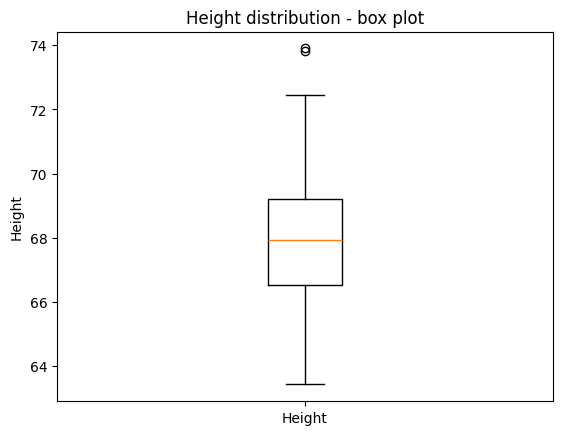

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('height_weight_data.csv', header=None, skiprows=1)

h = df[1].astype(float).dropna()

mean = h.mean()
median = h.median()
hmin, hmax = h.min(), h.max()
q1 = h.quantile(0.25)
q3 = h.quantile(0.75)
iqr = q3 - q1

print(
    f"Mean: {mean}\n"
    f"Median: {median}\n"
    f"Min: {hmin}  Max: {hmax}\n"
    f"Q1: {q1}  Q3: {q3}\n"
    f"IQR: {iqr}"
)

plt.figure()
plt.boxplot(h, vert=True, labels=["Height"])
plt.title("Height distribution - box plot")
plt.ylabel("Height")
plt.show()

#### Exercise 7
Read the CSV file named `datasaurus.csv` into a pandas DataFrame.

Then inspect the data. Retrieve and display names of datasets in the `dataset` column of the DataFrame.

In [7]:
import pandas as pd

df = pd.read_csv('datasaurus.csv')

print(df.head())

names = sorted(df["dataset"].astype(str).unique())
print("Dataset names:", names)
print("Total:", len(names))

  dataset        x        y
0    dino  55.3846  97.1795
1    dino  51.5385  96.0256
2    dino  46.1538  94.4872
3    dino  42.8205  91.4103
4    dino  40.7692  88.3333
Dataset names: ['away', 'bullseye', 'circle', 'dino', 'dots', 'h_lines', 'high_lines', 'slant_down', 'slant_up', 'star', 'v_lines', 'wide_lines', 'x_shape']
Total: 13


#### Exercise 8
Read the CSV file named `datasaurus.csv` into a pandas DataFrame.

For datasets named `dino` and `circle`:
- calculate and display for **x** values:
  - median
  - mean
  - standard deviation
  - variance
- create and display scatter plot for both datasets

dino - mean: 54.26327323943662
dino - median: 53.3333
dino - std: 16.765142039116785
dino - variance: 281.06998759176093



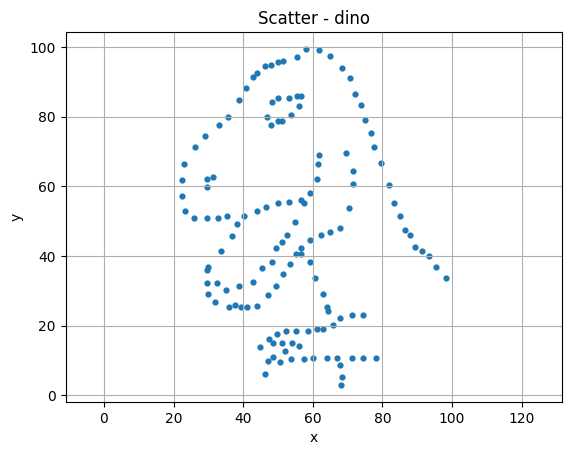

circle - mean: 54.267319706173936
circle - median: 54.0232131774
circle - std: 16.760012659672196
circle - variance: 280.89802435237226



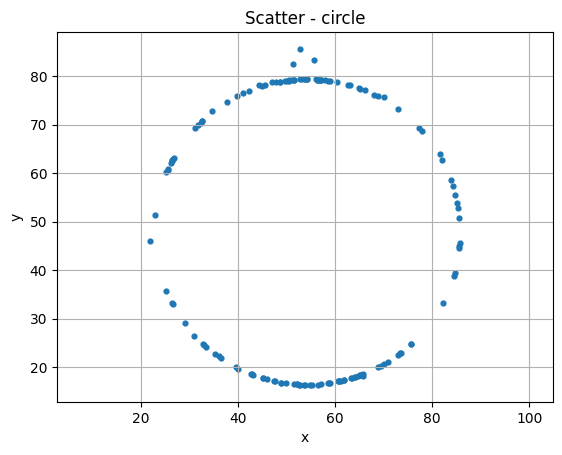

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datasaurus.csv")

for name in ["dino", "circle"]:
    sub = df[df["dataset"] == name]
    x = sub["x"]

    mean = x.mean()
    median = x.median()
    std = x.std(ddof=1)
    var = x.var(ddof=1)

    print(
        f"{name} - mean: {mean}\n"
        f"{name} - median: {median}\n"
        f"{name} - std: {std}\n"
        f"{name} - variance: {var}\n"
    )

    plt.figure()
    plt.scatter(sub["x"], sub["y"], s=12)
    plt.title(f"Scatter - {name}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.grid(True)
    plt.show()


#### Exercise 9
Read the CSV file named `anscombes.csv` into a pandas DataFrame.

Inspect the data and for each dataset calculate for **x** and **y**:
- mean
- median
- standard deviation
- variance

Example print for single dataset:
```
Dataset I:
Mean: 9.0
Median: 9.0
Std: 3.3166247903554
Variance: 11.0

Dataset II:
...
```

In [13]:
import pandas as pd

df = pd.read_csv("anscombes.csv")

for name, g in df.groupby("dataset"):
    x = g["x"]
    y = g["y"]

    print(f"Dataset {name}:")
    print(f"X - Mean: {x.mean():.4f}")
    print(f"X - Median: {x.median():.4f}")
    print(f"X - Std: {x.std(ddof=1):.15f}")
    print(f"X - Variance: {x.var(ddof=1):.4f}\n")

    print(f"Y - Mean: {y.mean():.4f}")
    print(f"Y - Median: {y.median():.4f}")
    print(f"Y - Std: {y.std(ddof=1):.15f}")
    print(f"Y - Variance: {y.var(ddof=1):.4f}\n")



Dataset I:
X - Mean: 9.0000
X - Median: 9.0000
X - Std: 3.316624790355400
X - Variance: 11.0000

Y - Mean: 7.5009
Y - Median: 7.5800
Y - Std: 2.031568135925815
Y - Variance: 4.1273

Dataset II:
X - Mean: 9.0000
X - Median: 9.0000
X - Std: 3.316624790355400
X - Variance: 11.0000

Y - Mean: 7.5009
Y - Median: 8.1400
Y - Std: 2.031656735501618
Y - Variance: 4.1276

Dataset III:
X - Mean: 9.0000
X - Median: 9.0000
X - Std: 3.316624790355400
X - Variance: 11.0000

Y - Mean: 7.5000
Y - Median: 7.1100
Y - Std: 2.030423601123667
Y - Variance: 4.1226

Dataset IV:
X - Mean: 9.0000
X - Median: 8.0000
X - Std: 3.316624790355400
X - Variance: 11.0000

Y - Mean: 7.5009
Y - Median: 7.0400
Y - Std: 2.030578511387602
Y - Variance: 4.1232



#### Exercise 10
Read the CSV file named `anscombes.csv` into a pandas DataFrame.

Visualize all datasets. Try to set up the 2x2 subplot grid.

Hint: `plt.subplots(2, 2, figsize=(10, 8))`
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

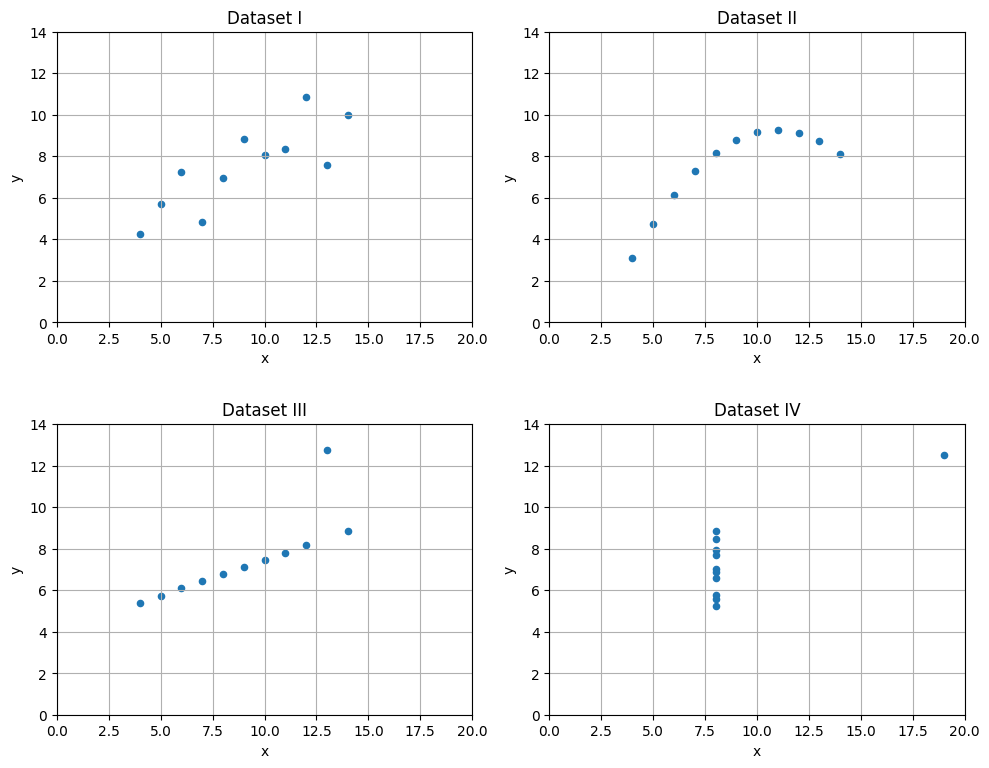

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("anscombes.csv")

order = pd.unique(df["dataset"])

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for ax, name in zip(axes, order):
    g = df[df["dataset"] == name]
    ax.scatter(g["x"], g["y"], s=20)
    ax.set_title(f"Dataset {name}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 14)
    ax.set_aspect("equal", adjustable="box")

plt.tight_layout()
plt.show()


#### Exercise 11
What are the conclusions for exercises 8-10?

Different datasets can have the same mean, median, std, and variance, but the plots look totally different.On graphs we see curves, lines, clusters, and outliers that numbers hide. So we should always make scatter plots and box plots, not just print numbers.